In [ ]:
#under Train the model
# there are steps explained

# Linear Regression with PyTorch
In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

<img src='../Images/linear-regression-residuals.png' width='400' style="display: inline-block"><br>


Image source: <a href='https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png'>https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png</a>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create a column matrix of X values
We can create tensors right away rather than convert from NumPy arrays.

we r not passing requires_grad=true

1.   List item
2.   List item



In [ ]:
torch.linspace(1,50,50)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50.])

In [ ]:
torch.linspace(1,50,50).shape

torch.Size([50])

In [ ]:
X = torch.linspace(1,50,50).reshape(-1,1) # 50 rows of one column each

# Equivalent to
# X = torch.unsqueeze(torch.linspace(1,50,50), dim=1)

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

## Create a "random" array of error values
We want 50 random integer values that collectively cancel each other out.

In [ ]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())
'''torch.randint
randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with random integers generated uniformly
between :attr:`low` (inclusive) and :attr:`high` (exclusive).

The shape of the tensor is defined by the variable argument :attr:`size`.'''

tensor(0.)


'torch.randint\nrandint(low=0, high, size, \\*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor\n\nReturns a tensor filled with random integers generated uniformly\nbetween :attr:`low` (inclusive) and :attr:`high` (exclusive).\n\nThe shape of the tensor is defined by the variable argument :attr:`size`.'

In [ ]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

## Create a column matrix of y values
Here we'll set our own parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$, plus the error amount.<br><strong><tt>y</tt></strong> will have the same shape as <strong><tt>X</tt></strong> and <strong><tt>e</tt></strong>

In [ ]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


In [ ]:
y

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])

## Plot the results
We have to convert tensors to NumPy arrays just for plotting.

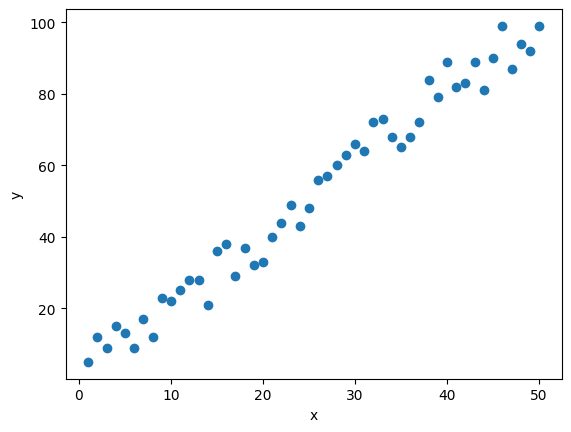

In [ ]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

## Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [ ]:
def test(i):
  i=i+1
  return i

test(9)


10

In [ ]:
k=test
k(0)

1

In [ ]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

## Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer.

In [ ]:
class Person:
  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  def printname(self):
    print(self.firstname, self.lastname)

#Use the Person class to create an object, and then execute the printname method:

x = Person("John", "Doe")
x.printname()


class Student(Person):
  pass
x = Student("Mike", "Olsen")
x.printname()


'''Note: The __init__() function is called automatically every time the class is being used to create a new object.

Add the __init__() function to the Student class:
'''
class Student1(Person):
  def __init__(self, fname, lname):
    #add properties etc.
    '''
When you add the __init__() function, the child class will no longer inherit the parent's __init__() function.

Note: The child's __init__() function overrides the inheritance of the parent's __init__() function

'''
'''
To keep the inheritance of the parent's __init__() function, add a call to the parent's __init__() function:

Example'''
class Student(Person):
  def __init__(self, fname, lname):
    Person.__init__(self, fname, lname)

''' or using super'''

class Student(Person):
  def __init__(self, fname, lname):
    super().__init__(fname, lname)
    #super().__init__() TypeError: Person.__init__() missing 2 required positional arguments: 'fname' and 'lname'


x = Student("Mike", "Olsen")
x.printname()

John Doe
Mike Olsen
Mike Olsen


In [ ]:
'''
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes:

import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))'''

'\nBase class for all neural network modules.\n\nYour models should also subclass this class.\n\nModules can also contain other Modules, allowing to nest them in\na tree structure. You can assign the submodules as regular attributes:\n\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nclass Model(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.conv1 = nn.Conv2d(1, 20, 5)\n        self.conv2 = nn.Conv2d(20, 20, 5)\n\n    def forward(self, x):\n        x = F.relu(self.conv1(x))\n        return F.relu(self.conv2(x))'

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [ ]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [ ]:
'''model.named_parameters
def named_parameters(prefix: str='', recurse: bool=True, remove_duplicate: bool=True) -> Iterator[Tuple[str, Parameter]]
Returns an iterator over module parameters, yielding both the
name of the parameter as well as the parameter itself.'''

"model.named_parameters \ndef named_parameters(prefix: str='', recurse: bool=True, remove_duplicate: bool=True) -> Iterator[Tuple[str, Parameter]]\nReturns an iterator over module parameters, yielding both the\nname of the parameter as well as the parameter itself."

In [ ]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


<div class="alert alert-info"><strong>NOTE:</strong> In the above example we had our Model class accept arguments for the number of input and output features.<br>For simplicity we can hardcode them into the Model:
         
<tt><font color=black>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(1,1)<br><br>
model = Model()
</font></tt><br><br>

Alternatively we can use default arguments:

<tt><font color=black>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, in_dim=1, out_dim=1):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(in_dim,out_dim)<br><br>
model = Model()<br>
<em>\# or</em><br>
model = Model(i,o)</font></tt>
</div>

Now let's see the result when we pass a tensor into the model.

In [ ]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [ ]:
x.shape

torch.Size([1])

In [ ]:
 (0.1060)*(2.0)+(0.9638)

1.1758

which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

## Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

In [ ]:
# trying to pass the input as tensor

x2 = torch.linspace(1,50,50).reshape(-1,1)

y2= model.forward(x2)
y2

tensor([[1.0698],
        [1.1758],
        [1.2817],
        [1.3877],
        [1.4937],
        [1.5997],
        [1.7056],
        [1.8116],
        [1.9176],
        [2.0236],
        [2.1296],
        [2.2355],
        [2.3415],
        [2.4475],
        [2.5535],
        [2.6594],
        [2.7654],
        [2.8714],
        [2.9774],
        [3.0834],
        [3.1893],
        [3.2953],
        [3.4013],
        [3.5073],
        [3.6132],
        [3.7192],
        [3.8252],
        [3.9312],
        [4.0372],
        [4.1431],
        [4.2491],
        [4.3551],
        [4.4611],
        [4.5671],
        [4.6730],
        [4.7790],
        [4.8850],
        [4.9910],
        [5.0969],
        [5.2029],
        [5.3089],
        [5.4149],
        [5.5209],
        [5.6268],
        [5.7328],
        [5.8388],
        [5.9448],
        [6.0507],
        [6.1567],
        [6.2627]], grad_fn=<AddmmBackward0>)

In [ ]:
x2.shape


torch.Size([50, 1])

In [ ]:
 x1 = np.linspace(X.min(),X.max(),50)
print(x1)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


In [ ]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.06977427 1.1757524  1.28173053 1.38770866 1.4936868  1.59966493
 1.70564306 1.81162119 1.91759932 2.02357745 2.12955558 2.23553371
 2.34151185 2.44748998 2.55346811 2.65944624 2.76542437 2.8714025
 2.97738063 3.08335876 3.1893369  3.29531503 3.40129316 3.50727129
 3.61324942 3.71922755 3.82520568 3.93118382 4.03716195 4.14314008
 4.24911821 4.35509634 4.46107447 4.5670526  4.67303073 4.77900887
 4.884987   4.99096513 5.09694326 5.20292139 5.30889952 5.41487765
 5.52085578 5.62683392 5.73281205 5.83879018 5.94476831 6.05074644
 6.15672457 6.2627027 ]


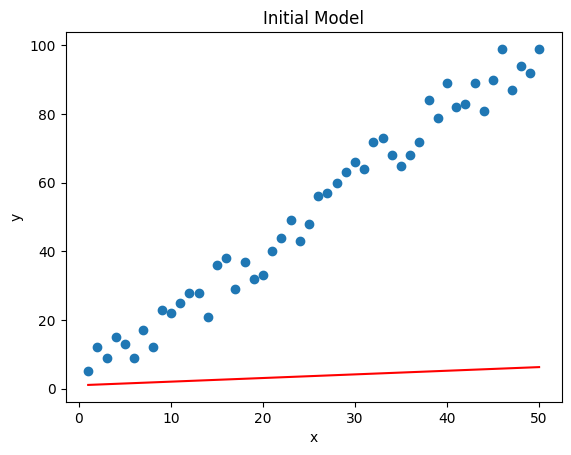

In [ ]:

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [ ]:
criterion = nn.MSELoss()

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [ ]:
epochs = 50
losses = []
weights=[]
for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)

    losses.append(loss.detach().numpy())


    '''losses.append(loss)
    losses --  [tensor(3057.2168, grad_fn=<MseLossBackward0>),
    tensor(1588.5306, grad_fn=<MseLossBackward0>),
    tensor(830.2999, grad_fn=<MseLossBackward0>),'''
    '''plt.plot(range(epochs), losses)
    # RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
    '''
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
              bias: {model.linear.bias.item():10.8f}')
    weights.append(model.linear.weight.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813                bias: 0.96379614
epoch:  2  loss: 1588.53063965  weight: 3.33490014                bias: 1.06046367
epoch:  3  loss: 830.29992676  weight: 1.01483285                bias: 0.99226284
epoch:  4  loss: 438.85217285  weight: 2.68179941                bias: 1.04252183
epoch:  5  loss: 236.76144409  weight: 1.48402131                bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592                bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538                bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409                bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576                bias: 1.02149546
epoch: 10  loss: 28.98922920  weight: 2.08060074                bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838                bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562                bias: 1.02911627
epoch: 13  loss: 22.

## Plot the loss values
Let's see how loss changed over time

In [ ]:
weights.sort()

Text(0.5, 0, 'epoch')

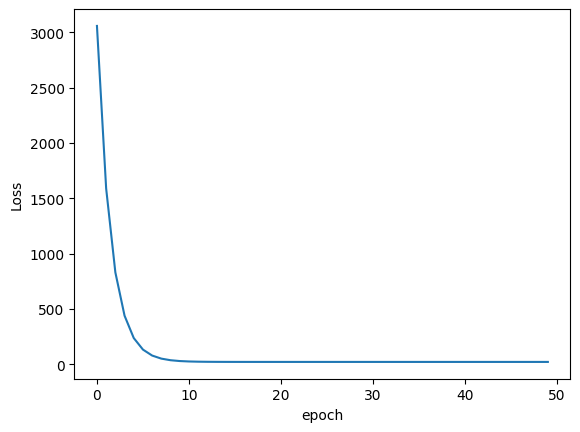

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

## Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [ ]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[  3.03957069   5.02338982   7.00720894   8.99102807  10.9748472
  12.95866632  14.94248545  16.92630458  18.91012371  20.89394283
  22.87776196  24.86158109  26.84540021  28.82921934  30.81303847
  32.7968576   34.78067672  36.76449585  38.74831498  40.7321341
  42.71595323  44.69977236  46.68359149  48.66741061  50.65122974
  52.63504887  54.61886799  56.60268712  58.58650625  60.57032537
  62.5541445   64.53796363  66.52178276  68.50560188  70.48942101
  72.47324014  74.45705926  76.44087839  78.42469752  80.40851665
  82.39233577  84.3761549   86.35997403  88.34379315  90.32761228
  92.31143141  94.29525054  96.27906966  98.26288879 100.24670792]


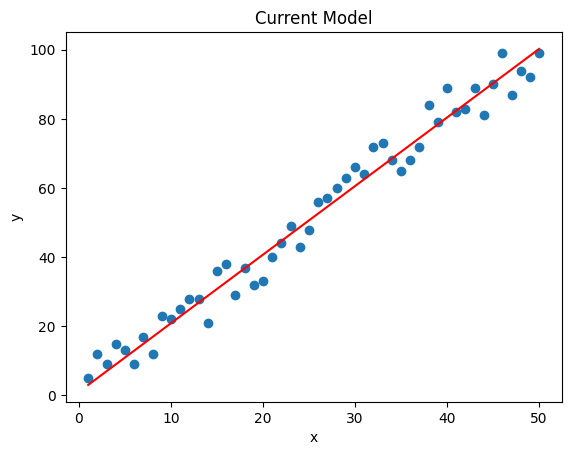

In [ ]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

## Great job!